### Modeling


* Tasks: 
  * Imlementing the following models: 
    * KNN
    * SVM
    * Logistic Regression 
  * Select the best mode

### Initialize required library


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.metrics import classification_report
import time

# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#svm
from sklearn import svm
#logestic regression
from sklearn.linear_model import LogisticRegression



### Load data

In [0]:
# Orginal data
df_train = pd.read_csv("./dataset/shuttle.trn", delimiter=' ', header=None)
df_test = pd.read_csv("./dataset/shuttle.tst", delimiter=' ', header=None)

X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]

### train data with removing outlier and doing oversampling
X_train_ros = pd.read_csv("./Pre-preocess/X_train_ros", delimiter=' ', header=None)
X_train_adasyn = pd.read_csv("./Pre-preocess/X_train_adasyn", delimiter=' ', header=None)
X_train_smt = pd.read_csv("./Pre-preocess/X_train_smt", delimiter=' ', header=None)
y_train_ros = pd.read_csv("./Pre-preocess/y_train_ros", delimiter=' ', header=None)
y_train_smt = pd.read_csv("./Pre-preocess/y_train_smt", delimiter=' ', header=None)
y_train_adasyn = pd.read_csv("./Pre-preocess/y_train_adasyn", delimiter=' ', header=None)

### test data
X_test = pd.read_csv('./Pre-preocess/X_test', delimiter=' ', header=None)
y_test = pd.read_csv('./Pre-preocess/y_test', delimiter=' ', header=None)



### Plot Info

In [0]:
# plot

# plt.rcParams['figure.figsize'] = [15, 10]
# plt.rcParams.update({'font.size': 22})
# fontdict = {'fontsize': 18,
#            'weight' : 'bold'}
# palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
# sns.set()

### Selecting the cross validation partition

In [0]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

### KNN


In [0]:
k_range = range(5,10)
means_smt = []

tic = time.time()
for k in k_range:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X_train_smt, y_train_smt, cv=skf)
    means_smt.append(score.mean())
toc = time.time()
time_cross_knn_smt = toc - tic


In [0]:
k_range = range(5,10)
means_ros = []

tic = time.time()
for k in k_range:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X_train_ros, y_train_ros, cv=skf)
    means_ros.append(score.mean())
toc = time.time()
time_cross_knn_ros = toc - tic

In [0]:
k_range = range(5,10)
means_adasyn = []

tic = time.time()
for k in k_range:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn.append(score.mean())
toc = time.time()
time_cross_knn_adasyn = toc - tic

<function matplotlib.pyplot.show>

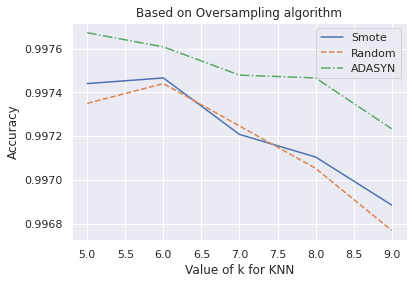

In [0]:
plt.plot(k_range, means_smt, linestyle='solid', label = "Smote")
plt.plot(k_range, means_ros, linestyle='dashed', label = "Random")
plt.plot(k_range, means_adasyn, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show



In [0]:
times = [round(time_cross_knn_smt,2), round(time_cross_knn_ros,2), round(time_cross_knn_adasyn,2)]
names = ['Smote', 'Random', 'ADASYN']
plt.plot(names, times, 'g^')
plt.xlabel('Type')
plt.ylabel('Time(second)')
plt.title('Time of cross validation based on oversampling algorithm')
plt.grid(True)
plt.show()
print(times)





*   for k = 5: I got the best value for adasyn
*   for k = 5: I got the best value for smt
*   for k = 5: I got the best value for ros


### SVM

In [0]:

C_range = [100, 1]
gamma_range = [0.01]
means_svm_rbf_smt = []

tic = time.time()
for C in C_range:
    for gamma in gamma_range:
        print(C,gamma)
        svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        score = cross_val_score(svm_model,X_train_smt, y_train_smt, cv=skf)
        means_svm_rbf_smt.append(score.mean())
toc = time.time()
time_cross_svm_rbf_smt = toc-tic


In [0]:
C_range = [100, 1]
gamma_range = [0.01]
means_svm_rbf_ros = []

tic = time.time()
for C in C_range:
    for gamma in gamma_range:
        svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        score = cross_val_score(svm_model,X_train_ros, y_train_ros, cv=skf)
        means_svm_rbf_ros.append(score.mean())
toc = time.time()
time_cross_svm_rbf_ros = toc-tic

In [0]:
C_range = [100, 1]
gamma_range = [0.01]
means_svm_rbf_adasyn = []

tic = time.time()
for C in C_range:
    for gamma in gamma_range:
        svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        score = cross_val_score(svm_model,X_train_adasyn, y_train_adasyn, cv=skf)
        means_svm_rbf_adasyn.append(score.mean())
toc = time.time()
time_cross_svm_rbf_adasyn = toc-tic

In [0]:
C_range = [100, 0.01]
means_linear_smt = []

tic = time.time()
for C in C_range:
        svm_model = svm.SVC(C=C, kernel='linear')
        score = cross_val_score(svm_model, X_train_smt, y_train_smt, cv=skf)
        means_linear_smt.append(score.mean())
toc = time.time()
time_cross_svm_smt = toc-tic

In [0]:
C_range = [100, 0.01]
means_linear_ros = []

tic = time.time()
for C in C_range:
        svm_model = svm.SVC(C=C, kernel='linear')
        score = cross_val_score(svm_model, X_train_ros, y_train_ros, cv=skf)
        means_linear_ros.append(score.mean())
toc = time.time()
time_cross_svm_ros = toc-tic

In [0]:
C_range = [100, 0.01]
means_linear_adasyn = []

tic = time.time()
for C in C_range:
        svm_model = svm.SVC(C=C, kernel='linear')
        score = cross_val_score(svm_model, X_train_adasyn, y_train_adasyn, cv=skf)
        means_linear_adasyn.append(score.mean())
toc = time.time()
time_cross_svm_adasyn = toc-tic

In [0]:
plt.plot([1, 2], means_svm_rbf_smt, linestyle='solid', label = "Smote")
plt.plot([1, 2], means_svm_rbf_ros, linestyle='dashed', label = "Random")
plt.plot([1, 2], means_svm_rbf_adasyn, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [0]:
plt.plot(C_range, means_linear_smt, linestyle='solid', label = "Smote")
plt.plot(C_range, means_linear_ros, linestyle='dashed', label = "Random")
plt.plot(C_range, means_linear_adasyn, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [0]:
times = [time_cross_svm_rbf_smt, time_cross_svm_rbf_ros, time_cross_svm_rbf_adasyn]
times_linear = [time_cross_svm_smt, time_cross_svm_ros, time_cross_svm_adasyn]
plt.plot([1, 2, 3], times, 'g^')
plt.plot([1, 2, 3], times_linear, 'bs')
plt.show()
print(times)

### Logestic Regression

In [0]:
c_range = range(5,10)
means_smt_liblinear_ovr = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='ovr')
    score = cross_val_score(lr, X_train_smt, y_train_smt, cv=skf)
    means_smt_liblinear_ovr.append(score.mean())
toc = time.time()
time_cross_means_smt_liblinear_ovr = toc-tic    

In [0]:
c_range = range(5,10)
means_ros_liblinear_ovr = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='ovr')
    score = cross_val_score(lr, X_train_ros, y_train_ros, cv=skf)
    means_ros_liblinear_ovr.append(score.mean())
toc = time.time()
time_cross_means_ros_liblinear_ovr = toc-tic    

In [0]:
c_range = range(5,10)
means_adasyn_liblinear_ovr = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='ovr')
    score = cross_val_score(lr, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn_liblinear_ovr.append(score.mean())
toc = time.time()
time_cross_means_adasyn_liblinear_ovr = toc-tic 

In [0]:
c_range = range(5,10)
means_smt_liblinear_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='multinomial')
    score = cross_val_score(lr, X_train_smt, y_train_smt, cv=skf)
    means_smt_liblinear_multinomial.append(score.mean())
toc = time.time()
time_cross_means_smt_liblinear_multinomial = toc-tic 

In [0]:
c_range = range(5,10)
means_ros_liblinear_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='multinomial')
    score = cross_val_score(lr, X_train_ros, y_train_ros, cv=skf)
    means_ros_liblinear_multinomial.append(score.mean())
toc = time.time()
time_cross_means_ros_liblinear_multinomial = toc-tic   

In [0]:
c_range = range(5,10)
means_adasyn_liblinear_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear', multi_class='multinomial')
    score = cross_val_score(lr, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn_liblinear_multinomial.append(score.mean())
toc = time.time()
time_cross_means_adasyn_liblinear_multinomial = toc-tic 

In [0]:
c_range = range(5,10)
means_smt_newton-cg_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='newton-cg', multi_class='multinomial')
    score = cross_val_score(lr, X_train_smt, y_train_smt, cv=skf)
    means_smt_newton-cg_multinomial.append(score.mean())
toc = time.time()
time_cross_means_smt_newton-cg_multinomial = toc-tic   

In [0]:
c_range = range(5,10)
means_ros_newton-cg_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='newton-cg', multi_class='multinomial')
    score = cross_val_score(lr, X_train_ros, y_train_ros, cv=skf)
    means_ros_newton-cg_multinomial.append(score.mean())
toc = time.time()
time_cross_means_ros_newton-cg_multinomial = toc-tic 

In [0]:
c_range = range(5,10)
means_adasyn_newton-cg_multinomial = []

tic = time.time()
for c in c_range:
    lr = LogisticRegression(C=c, random_state=0, solver='newton-cg', multi_class='multinomial')
    score = cross_val_score(lr, X_train_adasyn, y_train_adasyn, cv=skf)
    means_adasyn_newton-cg_multinomial.append(score.mean())
toc = time.time()
time_cross_means_adasyn_newton-cg_multinomial = toc-tic 

In [0]:
plt.plot(c_range, means_smt_liblinear_ovr, linestyle='solid', label = "Smote")
plt.plot(c_range, means_ros_liblinear_ovr, linestyle='dashed', label = "Random")
plt.plot(c_range, means_adasyn_liblinear_ovr, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [0]:
plt.plot(c_range, means_smt_liblinear_multinomial, linestyle='solid', label = "Smote")
plt.plot(c_range, means_ros_liblinear_multinomial, linestyle='dashed', label = "Random")
plt.plot(c_range, means_adasyn_liblinear_multinomial, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [0]:
plt.plot(c_range, means_smt_newton-cg_multinomial, linestyle='solid', label = "Smote")
plt.plot(c_range, means_ros_newton-cg_multinomial, linestyle='dashed', label = "Random")
plt.plot(c_range, means_adasyn_newton-cg_multinomial, linestyle='dashdot', label = "ADASYN")
plt.title("Based on Oversampling algorithm")
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [0]:
times_liblinear_ovr = [time_cross_means_smt_liblinear_ovr, time_cross_means_ros_liblinear_ovr, time_cross_means_adasyn_liblinear_ovr]
times_liblinear_multinomial = [time_cross_means_smt_liblinear_multinomial, time_cross_means_ros_liblinear_multinomial, time_cross_means_ros_liblinear_multinomial]
times_newton-cg_multinomial = [time_cross_means_smt_newton-cg_multinomial, time_cross_means_ros_newton-cg_multinomial, time_cross_means_adasyn_newton-cg_multinomial]

plt.plot([1, 2, 3], times_liblinear_ovr, 'g^')
plt.plot([1, 2, 3], times_liblinear_multinomial, 'bs')
plt.plot([1, 2, 3], times_newton-cg_multinomial, 'ro')

plt.show()

### Result of the algorithms in the test base

In [0]:
# best params----KNN
tic = time.time()
knn = KNeighborsClassifier(5)
# fit
knn.fit(X_train, y_train)
toc = time.time()
time_train_knn = toc - tic

# best params----SVM
tic = time.time()
svm_model = svm.SVC(gamma=0.001, kernel='rbf', C=0.001)
# fit
svm_model.fit(X_train, y_train)
toc = time.time()
time_train_svm = toc - tic

# best params----LR
tic = time.time()
lr = LogisticRegression(solver='liblinear', C=8, random_state=0)
# fit
lr.fit(X_train, y_train)
toc = time.time()
time_train_lr = toc - tic

tic = time.time()

toc = time.time()
 toc - tic

knn_pred = knn.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr.predict(X_test)


In [0]:
print("KNN Classification: ")
print(classification_report(knn_pred, y_test))

print("SVM Classification: ")
print(classification_report(svm_pred, y_test))

print("LR Classification: ")
print(classification_report(lr_pred, y_test))

KNN Classification: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11476
           2       1.00      0.87      0.93        15
           3       0.92      0.97      0.95        37
           4       1.00      1.00      1.00      2158
           5       0.99      0.99      0.99       808
           6       0.00      0.00      0.00         1
           7       1.00      0.40      0.57         5

    accuracy                           1.00     14500
   macro avg       0.84      0.75      0.78     14500
weighted avg       1.00      1.00      1.00     14500

SVM Classification: 
              precision    recall  f1-score   support

           1       1.00      0.86      0.93     13312
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.52      1.00      0.68      1117
           5       0.09      1.00      0.16        71
           6       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
